# Homework 2

**Name:** -- Roberto José --

**e-mail:** -- roberto.jose0745@alumnos.udg.mx --

# Modules

In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import levy_stable
import math

#Class Vec2d()

In [2]:
class Vec2d(object):
    """2D vector class with basic operations"""
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y=None):
        if y is None:
            self.x, self.y = x_or_pair
        else:
            self.x, self.y = x_or_pair, y

    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vec2d(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        # add scalar multiplication
        return Vec2d(self.x * scalar, self.y * scalar)

    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    def rotated(self, angle):
        cos, sin = math.cos(angle), math.sin(angle)
        return Vec2d(self.x * cos - self.y * sin, self.x * sin + self.y * cos)


# Correlated Random Walk (CRW)
A Correlated Random Walk is a movement pattern where each step is influenced by the previous step's direction. Unlike regular random walks where each step is completely random, CRWs tend to keep going in similar directions.

This type of movement is commonly used to model animal foraging behavior, robot path planning, and diffusion processes in physics and biology.

1. Each step:
* Uses the previous direction as a guide
* Adds a small random change in angle
* Moves forward by a fixed distance

2. The math is straightforward:
* Start at point zero (0,0)
* Pick a direction
* For each step:
 * Slightly change direction
 * Move forward
 * Record new position

In [3]:
# Activity 1: Correlated Random Walk - 1 Trajectory
def correlated_random_walk(steps=100):
    pos = Vec2d(0, 0)
    trajectory = np.zeros((steps, 2))

    direction = Vec2d(1, 0)  # Right direction

    for i in range(steps):
        angle = stats.cauchy.rvs()  # Cauchy distribution - rotation
        direction = direction.rotated(angle)
        pos += direction
        trajectory[i] = [pos.x, pos.y]

    return trajectory

# Graph
trajectory = correlated_random_walk(200)

fig = go.Figure()
fig.add_trace(go.Scatter(x=trajectory[:, 0], y=trajectory[:, 1], mode='lines'))
fig.show()


#Lévy Distribution
A Lévy distribution is a type of probability curve that extends the normal bell curve to include more extreme outcomes. It's useful for modeling events with occasional big jumps, like stock prices or animal movements.
Key Points:

Has "fat tails" - extreme events happen more often than in normal distributions
Controlled by four main settings:

* $α$ (alpha): Controls tail thickness (smaller = more extreme values)
* $β$ (beta): Controls whether outcomes lean left or right
* $m$ (scale): Controls how spread out values are
* $μ$ (location): Controls the center point

Special Cases:
* When $α = 2$: Just a regular normal distribution
* When $α = 1$, $β = 0$: Cauchy distribution (very wide spread)
* When $α = 0.5$, $β = 1$: One-sided Lévy distribution

The math formula is complex, but the distribution is useful for modeling financial risks, physics problems, and animal search patterns where occasional big jumps occur.

In [4]:
# Activity 2: Lévy distribution - N different curves
# Parameters
alpha_values = [0.1, 0.5, 1.0, 1.5, 1.9]
m, beta = 3.0, 0

# x-values
x = np.linspace(-10, 10, 500)

#Graph
fig = go.Figure()

for alpha in alpha_values:
    pdf = levy_stable.pdf(x, alpha, beta, loc=0, scale=m)
    fig.add_trace(go.Scatter(x=x, y=pdf, mode='lines', name=f'α = {alpha}'))

fig.show()


##Implementation

1. Generate random numbers following the Lévy pattern
2. Create a histogram to see the distribution
3. Compare with the theoretical curve

* When $α=1.5$ and $β=0$, we get a symmetric distribution with significant tails - showing how extreme values occur more frequently than in normal distributions.

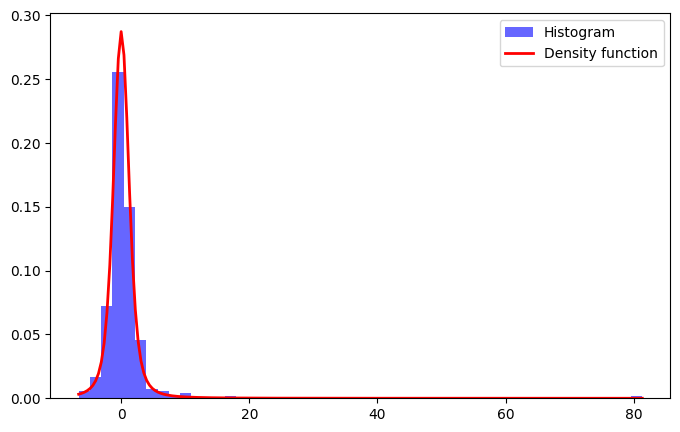

In [5]:
# Activity 3: Lévy distribution - Histogram + Curve
# Parameters
alpha, beta = 1.5, 0
samples = levy_stable.rvs(alpha, beta, size=300)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Histogram")

x = np.linspace(min(samples), max(samples), 200)
pdf = levy_stable.pdf(x, alpha, beta)
plt.plot(x, pdf, 'r-', lw=2, label="Density function")

plt.legend()
plt.show()


# Levy Flight
A Levy flight is a special kind of random walk where:

* Most steps are small
* Occasionally there are very big jumps (unlike normal random walks)

This pattern appears in nature:
* How animals search for food
* Stock market movements
* Some physics processes

How it works:

* **Step size:** Uses the Lévy distribution where:

 * $α = 1.5$ controls how often big jumps happen
Most steps are small, but some are surprisingly large

* **Direction:** Each step goes in a completely random direction $(0° - 360°)$

* **Movement process:**

 * Start at point $(0,0)$
 * For each step:
   * Choose a random step size (mostly small, sometimes big)
   * Choose a random direction
   * Move to the new position
   * Track the path





The result looks very different from normal random walks - it shows "clusters" of small movements connected by occasional long jumps.

In [6]:
# Activity 4: Lévy flight - Vec2d - 1 Trajecotry
def levy_flight(steps=100):
    pos = Vec2d(0, 0)
    trajectory = np.zeros((steps, 3))

    for i in range(steps):
        step_size = levy_stable.rvs(1.5, 0)  # Random distance
        angle_xy = np.random.uniform(0, 2*np.pi)
        direction = Vec2d(math.cos(angle_xy), math.sin(angle_xy)) * step_size
        pos += direction
        trajectory[i] = [pos.x, pos.y, i]

    return trajectory

# Graph
trajectory = levy_flight(200)

fig = go.Figure(data=[go.Scatter3d(
    x=trajectory[:, 0], y=trajectory[:, 1], z=trajectory[:, 2],
    mode='lines', marker=dict(size=4)
)])
fig.show()


# Multiple Correlated Random Walks
This activity shows how to create many random paths that are somewhat correlated, meaning they tend to keep going in a similar direction.  These paths are called Correlated Random Walks (CRW).  Instead of each path taking a totally random turn, they "remember" the previous direction a bit.

We make these paths different by giving each one a unique "turning" number. This number is chosen randomly, but some paths might have bigger turns than others.  We use a special type of random number generator called a Cauchy distribution that allows for these big turns.

How it works:
* Many paths are done.
* Each path gets its own random "turning" number.
* It calculates where each path goes step-by-step, using the "turning" number to decide how much to change direction.
* Showing these paths in a 3D graph using Plotly, with different colors for each path. This lets see how the different "turning" numbers affect how the paths move.

In [8]:
# Activity 5: Correlated Random Walk - Vec2d - N Trajectories
def multiple_correlated_random_walks(n_traj=6, steps=200):
    fig = go.Figure()

    for i in range(n_traj):
        cauchy_coeff = np.random.uniform(0.5, 2.0)  # Diferent coeficients for each trayectory
        trajectory = correlated_random_walk(steps)
        fig.add_trace(go.Scatter3d(
            x=trajectory[:, 0], y=trajectory[:, 1], z=np.arange(steps),
            mode='lines', name=f'Traj {i+1}'
        ))

    fig.show()

multiple_correlated_random_walks(5, 200)
